# Module 1 : Data Visualization

### Importing the libraries 

In [77]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Peek into the data by creating pandas

In [78]:
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')

In [79]:
star_df.head() #   <- top some result

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [80]:
star_df.sample(5)  #     <- some random samples 

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
119,3780,200000.0000,1324.000,-10.700,5,Red,M
166,19923,152000.0000,73.000,-5.690,4,Blue,O
198,3324,0.0065,0.471,12.780,1,Red,M
211,10012,552.0000,5.856,0.013,3,Blue-White,A
113,3399,117000.0000,1486.000,-10.920,5,Red,M


1. Dataset contans of 240 rows, 6 features nd 1 target columns,
- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color
- Spectral Class
- Star Type (Target classes) 

Here, 
- Lo = 3.828 x 10^26 Watts (Avg Luminosity od Sun)
- Ro = ^.9551 x 10^8 m (Avg Radius of Sun)
2. Two categorical features (object type) which will need some kind of encoding
- star Color
- Spectral Class

3. Some information about above excel sheet :
- 0 -> Brown dwaft 
- 1 -> Red draft
- 2 -> White draft 
- 3 -> Main sequence
- 4 -> Supergiants
- 5 -> Hypergiants

#### To check general information about the dataframe

star_df.info()   # <- for information about csv 

### Creating a dir to save the visualization :- 

In [81]:
# Create a directory to save the visualization
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)      # if it not exists create, if exists dont create 
base_dir = f"C:/Users/Sir/Documents/Analytics_practice/About-Stars/{folder_name}/"

### Visualize the count of start for each type of star (using matblotlib)

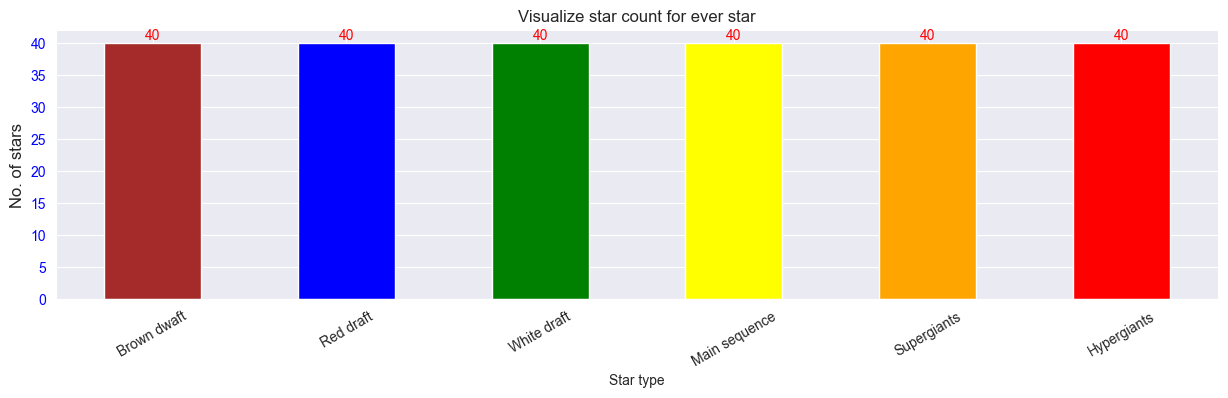

In [82]:
# Bar chart to visualize the count of stars with respective type

plt.figure(figsize=(15, 3.5))                                         # to adjust size 
#plt.style.use('dark_background')                                     # to change the background to dark  - default/ dark_bakground 

val = star_df['Star type'].value_counts().plot(kind="bar", color=['brown', 'blue', 'green', 'yellow', 'orange', 'red'])

val.bar_label(val.containers[0], color="red")                         # for label, for ever values in the bar graph, for color too 
plt.title("Visualize star count for ever star")
plt.yticks(color='blue')                                              # to change the color of the bar graph values i.e, 0,5,10,25,....

plt.xticks(ticks=[0,1,2,3,4,5],
           labels=['Brown dwaft', 'Red draft', 'White draft', 'Main sequence', 'Supergiants', 'Hypergiants'],   #to change ticks to labels
           rotation=30)                                              # for rotation of the value lables 

plt.ylabel("No. of stars", fontsize=12)
plt.savefig(base_dir + 'barplot_star_count.png')
plt.show()

### Visualize the count of start for each type of star (using seaborn)

C:\Users\Sir\AppData\Local\Temp\ipykernel_11672\2487637046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star_df['Star color'].value_counts().index,


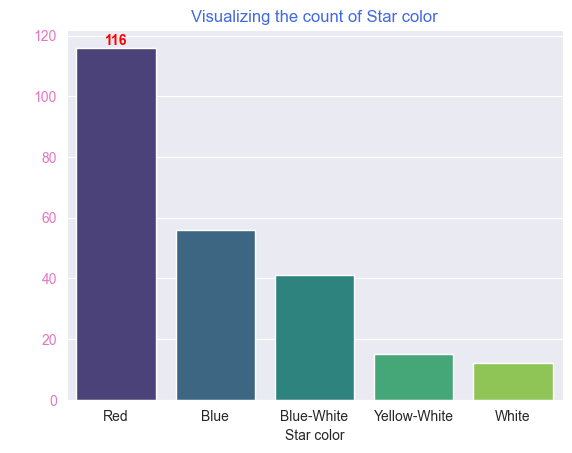

In [83]:
star_df['Star color'].value_counts()
# star_df['Star color'].value_counts().index    # for knowing the value present in requested column

# to plot 
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
           palette='viridis')
ax.bar_label(ax.containers[0], color='red', weight='bold')                 # for max value label highlight
plt.title('Visualizing the count of Star color', color='royalblue')
# plt.xticks(roration=1, color='orange')
plt.ylabel('Star color',color='white', fontsize=14)
plt.yticks(color='tab:pink')
plt.savefig(base_dir + "Visualizing using sns ")
plt.show()


## Visualization based on size and luminosity of start based on types ! 

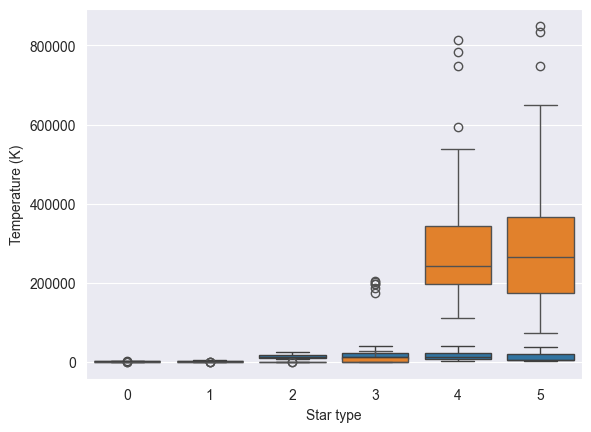

In [84]:

sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, 0])   # iloc -> location based on index (i.e., Temperature, luminosity, radius, magnitude)
sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, 1])
plt.show()

- 0 -> Brown dwaft 
- 1 -> Red draft
- 2 -> White draft 
- 3 -> Main sequence
- 4 -> Supergiants
- 5 -> Hypergiants

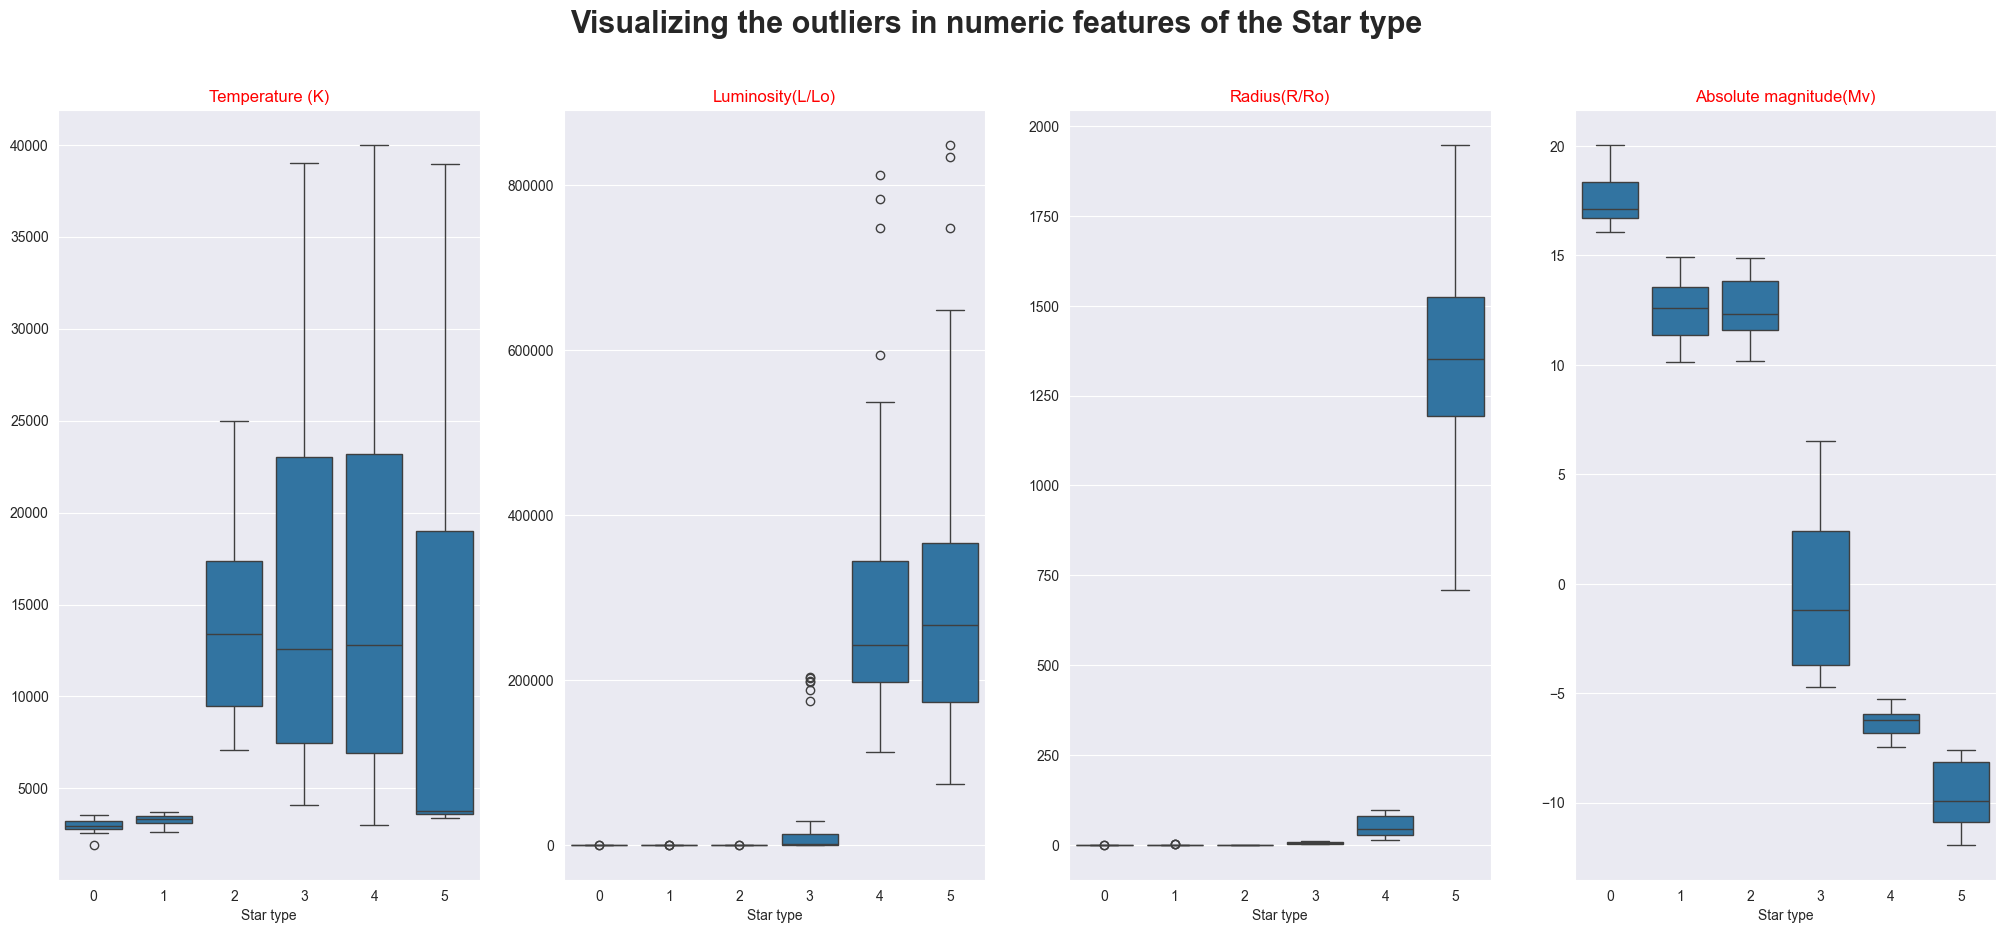

In [85]:
# plt.subplot(rows, cols, positions)  # values accordingly 
# plt.subplot(1,4,1)
# sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, 0])

plt.figure(figsize=(25,10))
plt.suptitle('Visualizing the outliers in numeric features of the Star type', fontsize=22, weight='bold')

for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i]) 
    plt.title(star_df.columns[i], color='red')
    plt.ylabel('')

plt.savefig(base_dir + 'Visualizing acc Types !')
# plt.show()

## Creating a lineplots 
- Show how the values are distributed to each of the numeric features.
- Again create a subplot but with 4 rows and 1 column. 

In [86]:
def line_plot(star_df, colors, i):          # what is the function doing : line plot for the numeric features
    plt.subplot(4, 1, i+1)
    plt.plot(star_df.iloc[:, i],  color=colors[i])
    plt.title(star_df.columns[i] )
    
    

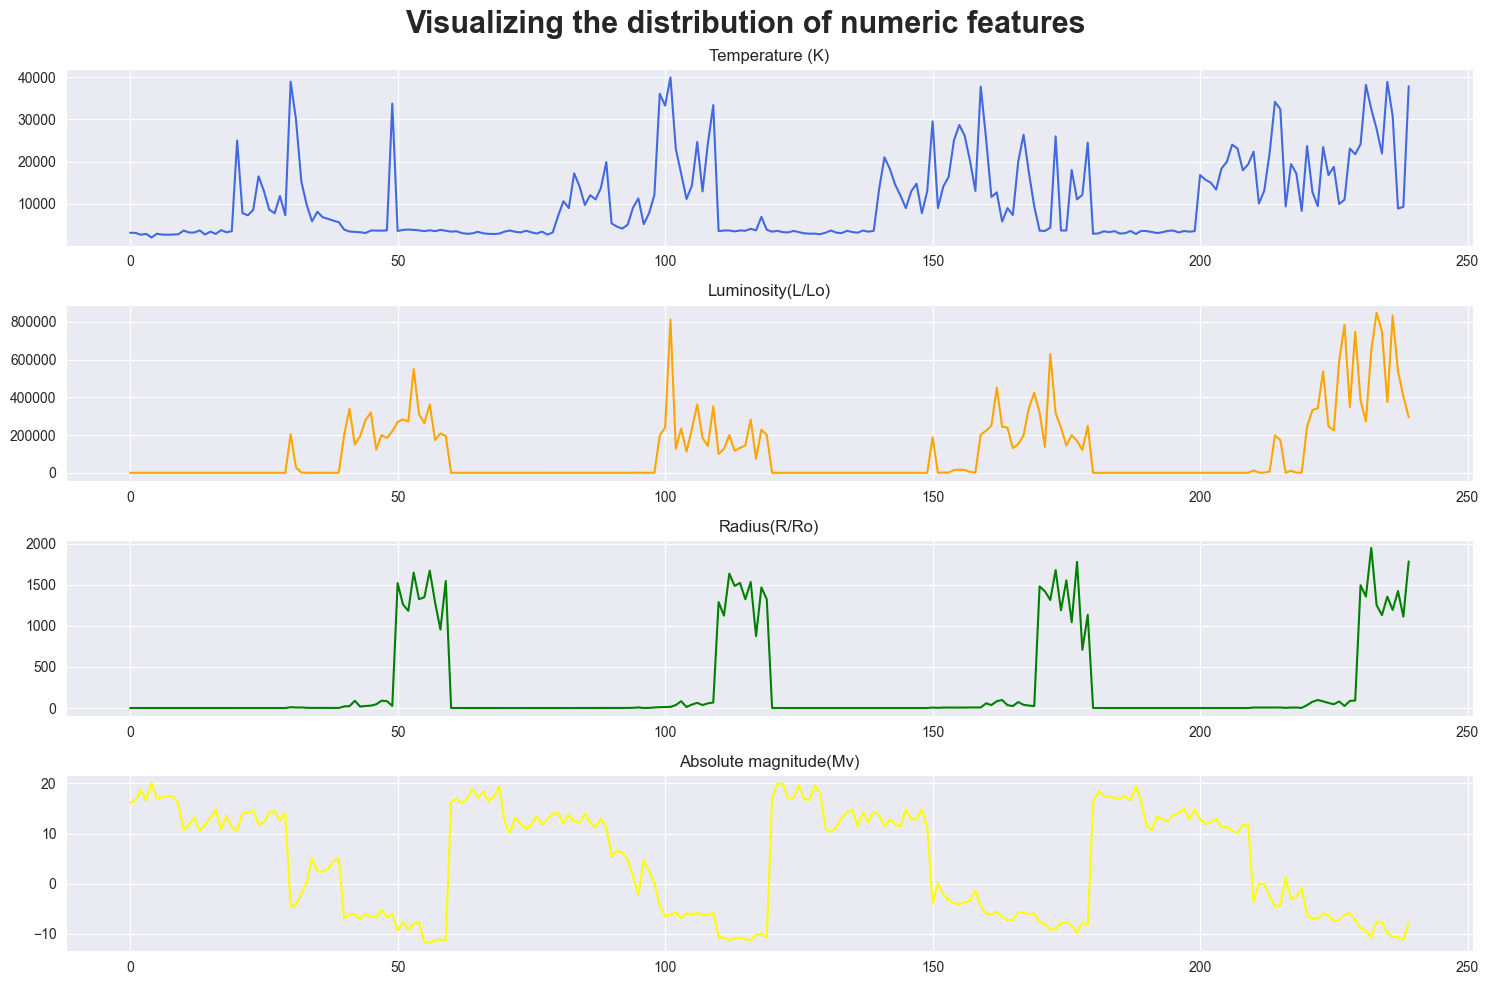

In [87]:
# line plot 
colours = ['royalblue', 'orange', 'green', 'yellow']
plt.figure(figsize=(15, 10)) # to adjust the size of the plot
plt.suptitle('Visualizing the distribution of numeric features', fontsize=22, weight='bold')


for i in range(4):           
    line_plot(star_df, colours, i)          # using the function to plot the line plot


plt.tight_layout() # to adjust the space between the plots  
plt.savefig(base_dir + 'line_plot.png')
plt.show()

## Pair Plot 
- Scatter plot for all the numeric features to see the relationship between them.
- Use Seaborn to get the sub plot without coding for it. 
- eg : how temp is changing with luminosity, radius, magnitude.

#### Creating a pair plot
- It gives the scatter plot default and we can change the kind of we want for of all variables with each other. 
- It give all the plot together without using subplot manually.

Disadvantages :
- It is not good for large dataset. ie., lots of columns
- It is slow for large dataset.

Use :
- However, as we less features let's obtain the pair plot with hue set to Spectral class. 
- Hue will allows us to compare the relationship between the variables with respect to the spectral class.

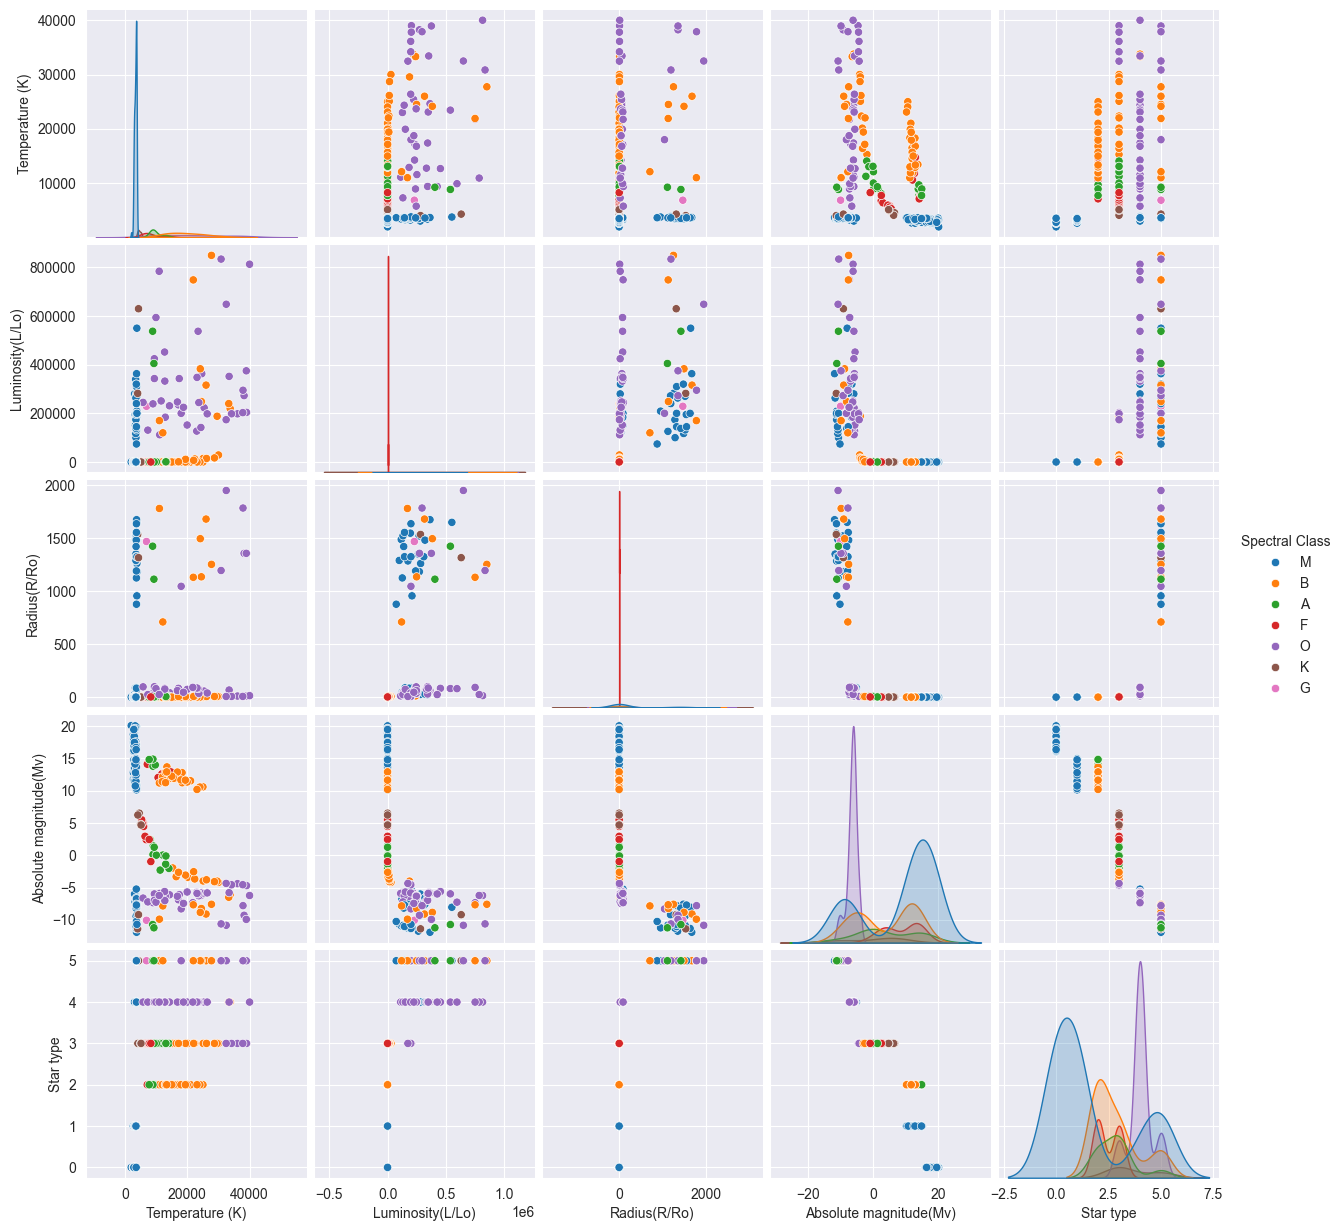

In [88]:
# Get a pair plot for the dataset - scatter

sns.pairplot(star_df, hue='Spectral Class')
plt.savefig(base_dir + 'pair_plot.png')
plt.show()

## Creating a HR diagram. 


In [89]:
star_type = star_df['Star type'].values     # will be used for the color of the points
temp = star_df['Temperature (K)'].values        # will give the x-axis values as a list
abs_mag = star_df['Absolute magnitude(Mv)'].values

# Python dictionary --> Made of key value pairs
star_types = {
    0: {'label': 'Brown dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'blue', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'},
}


In [90]:
star_types[0]  # to get the value of the key
# star_types[0]['label']  # to get the value of the key ie., lable : Brown dwarf
# star_types[star_type[100]]['marker']  # to get the marker of the star type

{'label': 'Brown dwarf', 'color': 'brown', 'size': 30, 'marker': '.'}

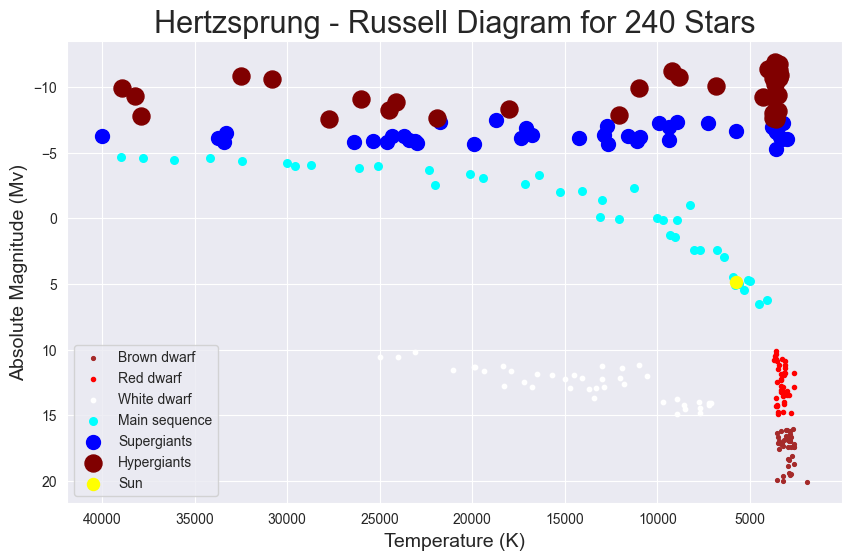

In [91]:
# Plotting a HR diagram for Temp vs Abs mag

axes = []
labels = set()

plt.figure(figsize=(10, 6))

for i in range(len(star_type)):
    properties = star_types[star_type[i]]  # to get the properties of the star type
    
    if properties['label'] not in labels:
        ax = plt.scatter(temp[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
        
        axes.append(ax) # to append the axes to the list
        labels.add(properties['label']) # to add the label to the set (unique values)
    
    else:
        plt.scatter(temp[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])

# Adding Data for the Sun
ax_sun = plt.scatter(5778, 4.83, s=75, c='yellow', marker='o', label='Sun')
axes.append(ax_sun)
labels.add("Sun")

# Adding title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=22)

# Adding labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=14)
plt.xlabel("Temperature (K)", fontsize=14)

plt.legend(handles=axes)

plt.gca().invert_xaxis()  # to invert the x-axis
plt.gca().invert_yaxis()  # to invert the y-axis

plt.savefig(base_dir + 'Hertzsprung_Russell_Diagram.png')
plt.show()


## Downloading Visualization
- How to save these visualizations directory in our system from colab notebook.

### Theory is in your brain, practice is in your hand.

# Module 2 